<a href="https://colab.research.google.com/github/ZikrullaRaxmatov/ML_DL_lessons/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Data analysis
train_data = pd.read_csv("./sample_data/california_housing_train.csv")
#test_data = pd.read_csv("./sample_data/california_housing_test.csv")
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


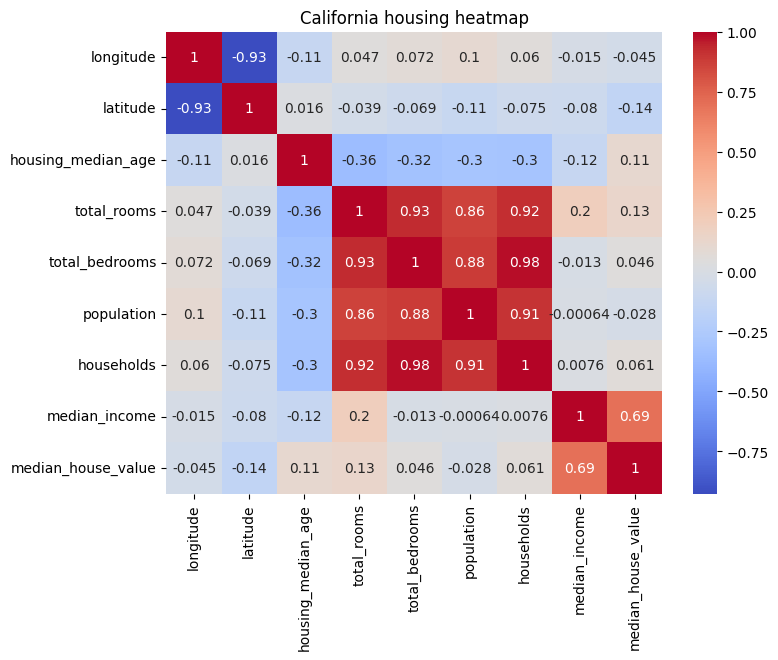

In [32]:
# Checking correlations
plt.figure(figsize=(8, 6))
sns.heatmap(data=train_data.corr(), annot=True, cmap='coolwarm')
plt.title('California housing heatmap')
plt.show()

In [42]:
# Splitting the data into train and test
#train_inputs = train_data.drop('median_house_value', axis=1)
train_inputs = train_data[['total_rooms']]
train_output = train_data['median_house_value']

#test_inputs = test_data[['median_income']]
#test_output = test_data['median_house_value']

In [43]:
# Creating a model
model = LinearRegression()

# Splitting by mannualy
x_train, x_test, y_train, y_test = train_test_split(train_inputs, train_output, test_size=0.10, random_state=14)

# Training the model
model.fit(x_train, y_train)

# Predicting the model
pred_output = model.predict(x_test)

# Evaluating the model
mae = mean_absolute_error(y_test, pred_output)
mse = mean_squared_error(y_test, pred_output)
r2 = r2_score(y_test, pred_output)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

MAE: 90935.02580694124
MSE: 13173315836.751852
R2: 0.021346097861071667


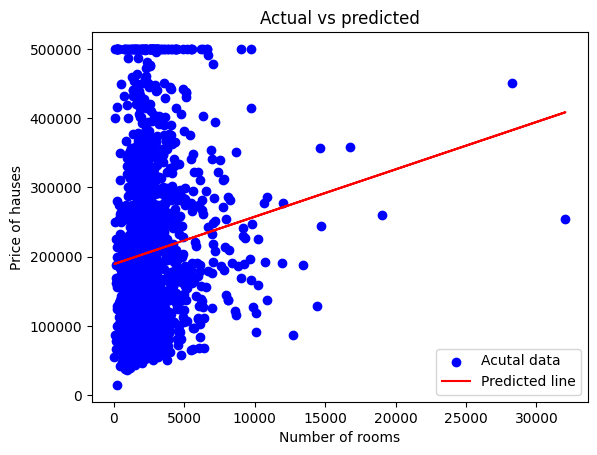

In [45]:
plt.scatter(x_test, y_test, color='blue', label='Acutal data')
plt.plot(x_test, pred_output, color='red', label='Predicted line')
plt.title('Actual vs predicted')
plt.xlabel('Number of rooms')
plt.ylabel('Price of hauses')
plt.legend()
plt.show()